In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

C:\Users\459880\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
# Generate 2D data points
X, _ = make_blobs(n_samples=200, centers=4, n_features=2,
                 cluster_std=0.5,  random_state=0)
X[:11]

array([[ 2.20438661,  1.56085661],
       [-1.13374003,  2.68467271],
       [ 1.06498315,  4.10289686],
       [-2.37603789,  7.32420659],
       [ 1.68289011,  0.48444439],
       [ 0.98152009,  5.19672257],
       [-1.6823471 ,  2.96658234],
       [ 0.5323772 ,  3.31338909],
       [ 1.59141542,  4.90497725],
       [ 1.34081536,  4.36827878],
       [ 0.65910903,  4.12241674]])

In [32]:
print(f'shape of X is {len(X)}')

shape of X is 200


In [33]:
obj_names = [f'Obj_{i}' for i in range(len(X))]

In [44]:
import pandas as pd
# Create a pandas DataFrame with the names and (x, y) coordinates
df = pd.DataFrame({'Object': obj_names,'X1_value': X[:, 0],'X2_value': X[:, -1]})
df.head()

,Object,X1_value,X2_value
0,Obj_0,2.204387,1.560857
1,Obj_1,-1.133740,2.684673
2,Obj_2,1.064983,4.102897
3,Obj_3,-2.376038,7.324207
4,Obj_4,1.682890,0.484444


In [45]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [46]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['X1_value','X2_value']])
    distortions.append(kmeanModel.inertia_)
#inertia_float
#Sum of squared distances of samples to their closest cluster center.

In [52]:
#kmeanModel.

In [51]:
#help(kmeanModel.inertia_)

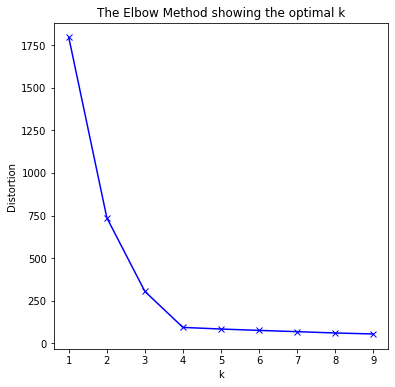

In [49]:
#Elbow curve use to find out the optimal value of k(no. of clusters)
plt.figure(figsize=(6,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [71]:
kmns = KMeans(n_clusters=4)
kmns.fit(df[['X1_value','X2_value']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmns.fit_predict(df[['X1_value','X2_value']])

array([0, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3, 0, 2, 2, 0, 3, 1, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 3, 1, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 1, 1, 3,
       0, 2, 3, 1, 1, 3, 1, 2, 2, 1, 3, 1, 2, 0, 3, 0, 1, 3, 0, 3, 1, 3,
       0, 1, 2, 2, 0, 0, 3, 3, 2, 1, 2, 2, 0, 0, 1, 3, 0, 2, 2, 3, 3, 0,
       2, 2, 1, 1, 1, 3, 3, 0, 2, 1, 3, 3, 1, 0, 0, 1, 1, 2, 3, 0, 0, 3,
       1, 2, 2, 0, 0, 3, 2, 2, 1, 3, 1, 2, 3, 0, 3, 2, 3, 2, 0, 3, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 3, 0, 2, 1, 1, 1, 3, 2,
       0, 3, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 3, 0, 0, 2, 0, 3, 2, 1, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 3, 2, 2, 1, 3, 1, 0, 0, 3, 1, 2, 2, 2, 3,
       1, 0])

In [101]:
df['clstr_nbr'] = y_kmeans
df.head(10)

,Object,X1_value,X2_value,clstr_nbr
0,Obj_0,2.204387,1.560857,0
1,Obj_1,-1.133740,2.684673,2
2,Obj_2,1.064983,4.102897,3
3,Obj_3,-2.376038,7.324207,1
4,Obj_4,1.682890,0.484444,0
5,Obj_5,0.981520,5.196723,3
6,Obj_6,-1.682347,2.966582,2
7,Obj_7,0.532377,3.313389,3
8,Obj_8,1.591415,4.904977,3
9,Obj_9,1.340815,4.368279,3


In [116]:
import seaborn as sns
sns.set_style('dark')

In [117]:
colors=['red','blue','green','black']

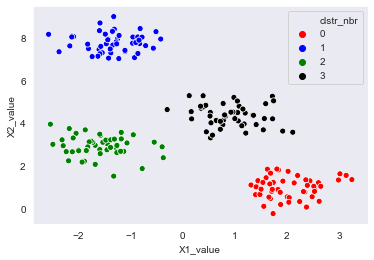

In [118]:
sns.scatterplot(data = df, x = 'X1_value', y = 'X2_value', hue = 'clstr_nbr',palette = colors)

In [120]:
kmns.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}